In [ ]:
import numpy as np
import pandas as pd

import tensorflow as tf
from tensorflow import keras
from tensorflow import cast
from tensorflow.keras import Sequential
import keras.layers as layers
import glob
import pandas as pd
import csv
import sklearn.cluster as cluster
import matplotlib.pyplot as plt


In [ ]:
!unzip /content/DataSetForLstm.zip

Archive:  /content/DataSetForLstm.zip
  inflating: DataSetForLstm/401.bzip2.csv  
  inflating: DataSetForLstm/435.gromacs.csv  
  inflating: DataSetForLstm/444.namd.csv  
  inflating: DataSetForLstm/456.hammer1.csv  
  inflating: DataSetForLstm/456.hammer2.csv  
  inflating: DataSetForLstm/462.libquantum.csv  
  inflating: DataSetForLstm/464.h264ref1.csv  
  inflating: DataSetForLstm/464.h264ref2.csv  
  inflating: DataSetForLstm/464.h26ref3.csv  
  inflating: DataSetForLstm/465.tonto.csv  
  inflating: DataSetForLstm/470.lbm.csv  
  inflating: DataSetForLstm/473.astar.BigLakes.csv  
  inflating: DataSetForLstm/475.astar.River.csv  
  inflating: DataSetForLstm/Untitled_spreadsheet_-_cactus.csv  


In [ ]:

PATH = "/content/DataSetForLstm/*.csv"

x, y = [], []
fileName = []
for fname in glob.glob(PATH):
    csvreader = csv.reader(fname)
    fileName.append(fname)
    print(fname)
    time, value = [], []
    data= pd.read_csv(fname)
    data.columns = ['time', 'ipc', 'phase']
    print(data.head())
    data = data.dropna()
    x.append(data[['time', 'ipc']].values)
    y.append(data['phase'].values)

/content/DataSetForLstm/456.hammer2.csv
   time   ipc  phase
0   2.0  2.66      0
1   3.0  2.66      0
2   4.0  2.66      0
3   5.0  2.66      0
4   6.0  2.66      0
/content/DataSetForLstm/456.hammer1.csv
   time   ipc  phase
0   2.0  2.59      0
1   3.0  2.59      0
2   4.0  2.59      0
3   5.0  2.59      0
4   6.0  2.59      0
/content/DataSetForLstm/464.h264ref2.csv
   time   ipc  phase
0   2.0  2.06      0
1   3.0  2.30      0
2   4.0  2.13      0
3   5.0  2.31      0
4   6.0  2.27      0
/content/DataSetForLstm/465.tonto.csv
       time    ipc  phase
0  2.000298  2.705      0
1  3.000447  2.565      0
2  4.000589  2.695      0
3  5.000736  2.470      0
4  6.000867  2.725      0
/content/DataSetForLstm/444.namd.csv
   time   ipc  phase
0   2.0  2.21      0
1   3.0  2.05      0
2   4.0  2.29      0
3   5.0  2.04      0
4   6.0  2.25      0
/content/DataSetForLstm/435.gromacs.csv
       time    ipc  phase
0  1.000112  2.480      0
1  2.000302  2.465      0
2  3.000453  2.450      0


In [ ]:
def plotGraph(x):
  plt.plot(x[:, 0], x[:, 1])
  plt.show()

def getClusters(x, eps=0.05, n=4):
  algo = cluster.DBSCAN(eps=eps, min_samples=n)
  algo.fit(x)
  return algo, algo.labels_

def plotClusters(x, labs):
  plt.scatter(x[:, 0], x[:, 1], c=labs)
  plt.show()

def avgValues(x, labs):
  avg = {}
  uniqs = np.unique(labs)
  for i in uniqs:
    if i == -1:
      continue
    temp=[m for m, j in enumerate(labs) if j == i]
    avg[i] = np.average(x[temp, 1])
  return avg

/content/DataSetForLstm/456.hammer2.csv


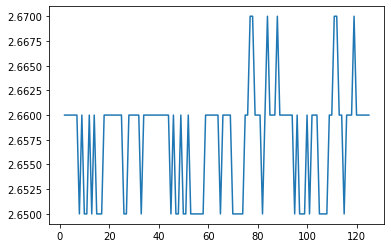

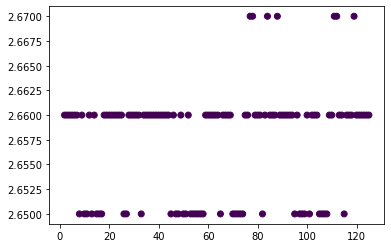

{0: 2.6575000000000006}



/content/DataSetForLstm/456.hammer1.csv


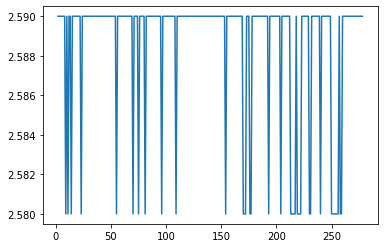

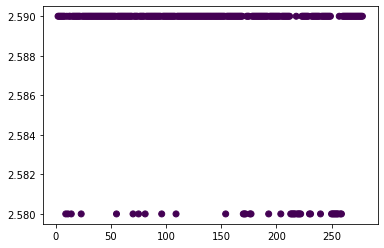

{0: 2.5885920577617325}



/content/DataSetForLstm/464.h264ref2.csv


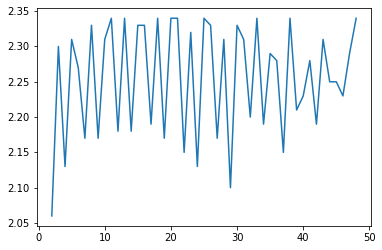

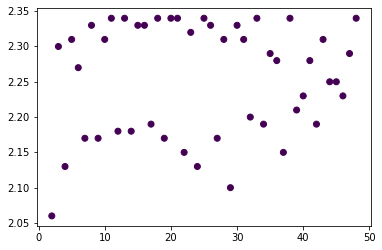

{0: 2.2551063829787235}



/content/DataSetForLstm/465.tonto.csv


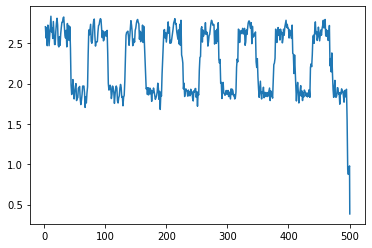

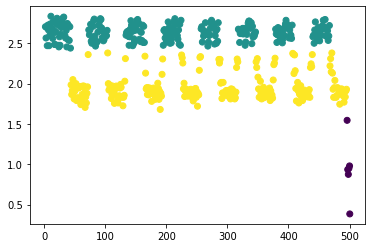

{0: 2.6376612903225807, 1: 1.9471544715447155}



/content/DataSetForLstm/444.namd.csv


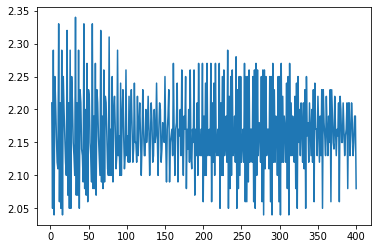

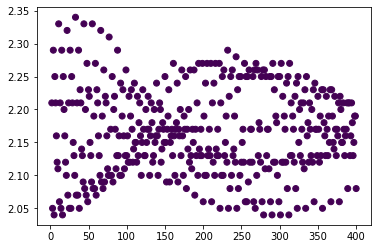

{0: 2.1658145363408523}



/content/DataSetForLstm/435.gromacs.csv


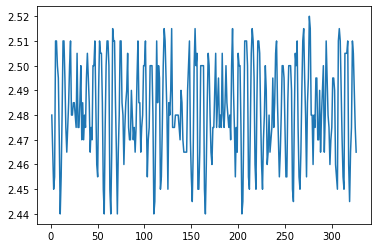

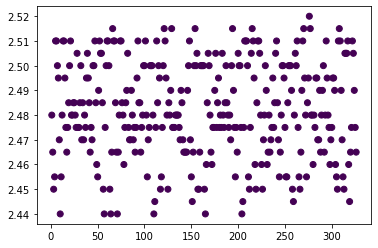

{0: 2.4823466257668714}



/content/DataSetForLstm/475.astar.River.csv


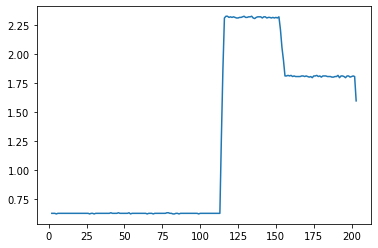

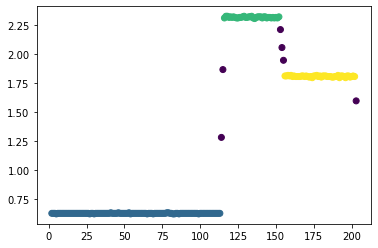

{0: 0.6247767857142856, 1: 2.316081081081081, 2: 1.8065957446808516}



/content/DataSetForLstm/464.h264ref1.csv


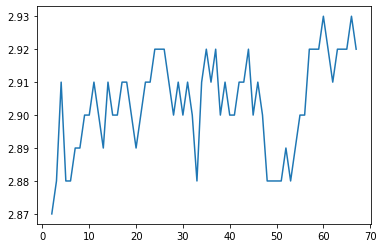

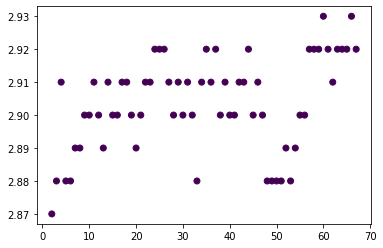

{0: 2.9036363636363633}



/content/DataSetForLstm/401.bzip2.csv


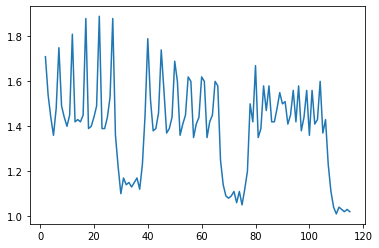

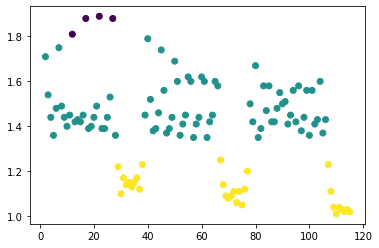

{0: 1.4806249999999999, 1: 1.1136666666666668}



/content/DataSetForLstm/462.libquantum.csv


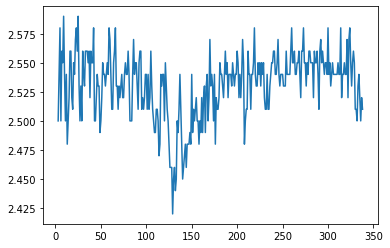

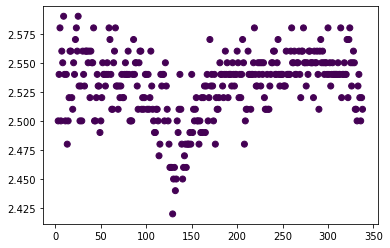

{0: 2.5306249999999997}



/content/DataSetForLstm/473.astar.BigLakes.csv


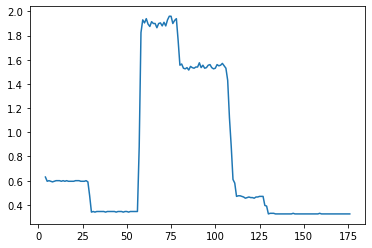

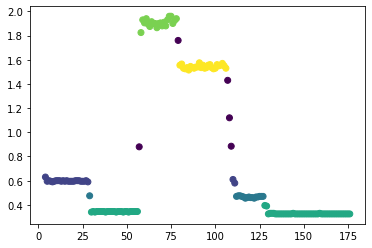

{0: 0.5977777777777776, 1: 0.4661764705882353, 2: 0.33381578947368423, 3: 1.9066666666666663, 4: 1.5431481481481482}



/content/DataSetForLstm/464.h26ref3.csv


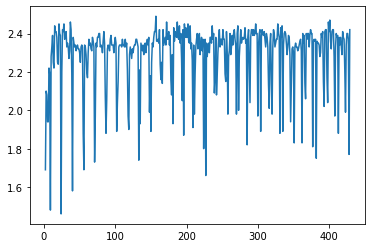

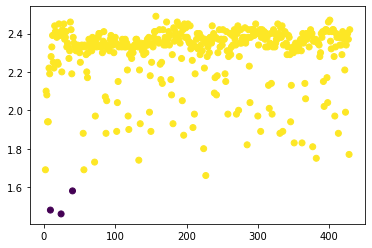

{0: 2.296}



/content/DataSetForLstm/Untitled_spreadsheet_-_cactus.csv


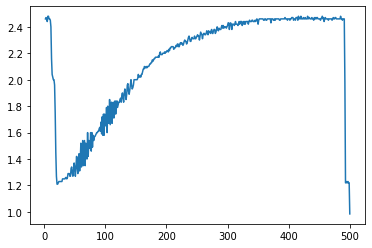

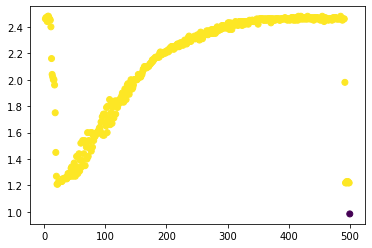

{0: 2.1379919678714865}



/content/DataSetForLstm/470.lbm.csv


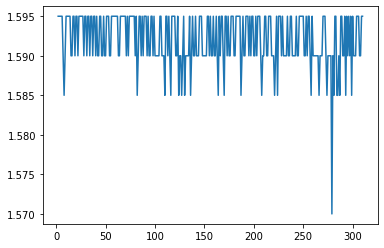

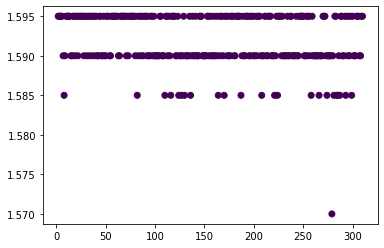

{0: 1.592022653721683}





In [ ]:
for i in range(14):
  print(fileName[i])
  plotGraph(x[i])
  l = np.reshape(x[i][:, 1], (x[i].shape[0], 1))
  _, labs = getClusters(l)
  plotClusters(x[i], labs)
  avg = avgValues(x[i], labs)
  print(avg)
  print('\n\n')